## Sentiment analysis with few plots for the EDA

### Importing Libraries

In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

### Reading the dataset from scraping.ipynb

In [3]:
df = pd.read_csv('data.csv', dtype={'Title':'str', 'Body':'str', 'Stars':'int64'})

In [4]:
df.head()

,Title,Body,Stars
0,ne puoi fare a meno fin quando non lo provi,spedizione amazon sulle spedizione è una gar...,5
1,ottimo ma,allora non si capisce perché la versione con o...,5
2,qualità audio ottima ma attenzione a disattiv...,l echo dot è un dispositivo interessante ma h...,4
3,la domotica alla portata di tutti,spedizione rapidissima come da tradizione am...,5
4,echo dot un assistente virtuale di qualità ...,ho acquistato l echo dot e devo dire che son...,5


### Removing Stopwords

The stopwords are words that are filtered out before, or after, the actual words in the text that carry the information. In fact, most stop words have no particular meaning when isolated from the text. 

For the further modelling I still included the stopwords since sometimes they remove some context in the phrase.

In [5]:
list_title = df['Title'].to_list()
stopwords = nltk.corpus.stopwords.words('italian')
words_title = [word for text in list_title for word in nltk.word_tokenize(text)]
words_title_clear = [w for w in words_title if w not in stopwords]

### Most common words in titles and bodies

The function FreqDist creates a dictionary as per key the word and as value the number of times that word accurs in the text

In [6]:
fd_title = nltk.FreqDist(words_title_clear)

sorted_fd_title = dict(sorted(fd_title.items(), key=lambda item: item[1], reverse=True)) # sorting the dictionary based on the key (number of occurences per word)

/var/folders/qg/gd9h1fz150q_s3t9_v7l4qd80000gn/T/ipykernel_1673/1373915822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categories', y='Values', data=df_freq_title, palette='Set2')


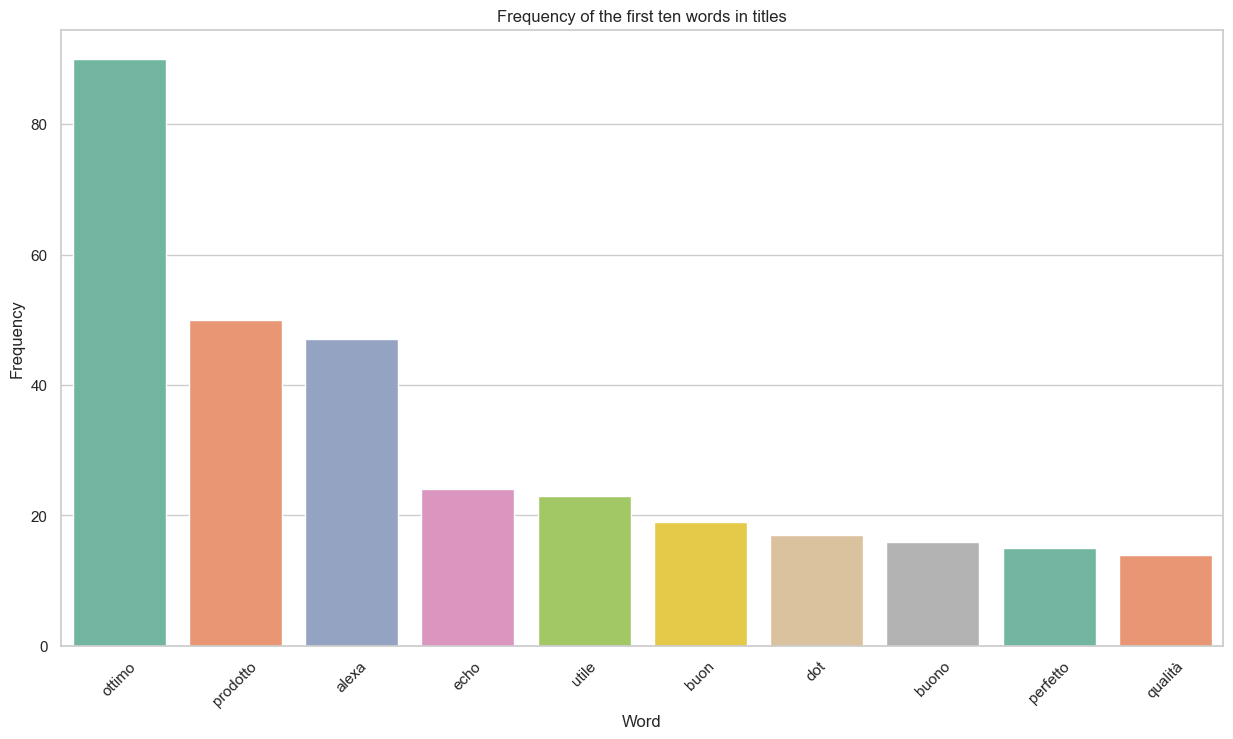

In [7]:
df_freq_title = pd.DataFrame(list(sorted_fd_title.items())[:10], columns=['Categories', 'Values'])

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Categories', y='Values', data=df_freq_title, palette='Set2')

ax.set(xlabel='Word', ylabel='Frequency', title='Frequency of the first ten words in titles')
plt.xticks(rotation=45)

plt.show()

In [8]:
list_body = df['Body'].to_list()
list_body = [str(word) for word in list_body]
words_body = [word for text in list_body for word in nltk.word_tokenize(text)]
words_body_clear = [w for w in words_body if w.lower() not in stopwords]

In [9]:
fd_body = nltk.FreqDist(words_body_clear)

sorted_fd_body = dict(sorted(fd_body.items(), key=lambda item: item[1], reverse=True))

/var/folders/qg/gd9h1fz150q_s3t9_v7l4qd80000gn/T/ipykernel_1673/4033434615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categories', y='Values', data=df_freq_body, palette='Set2')


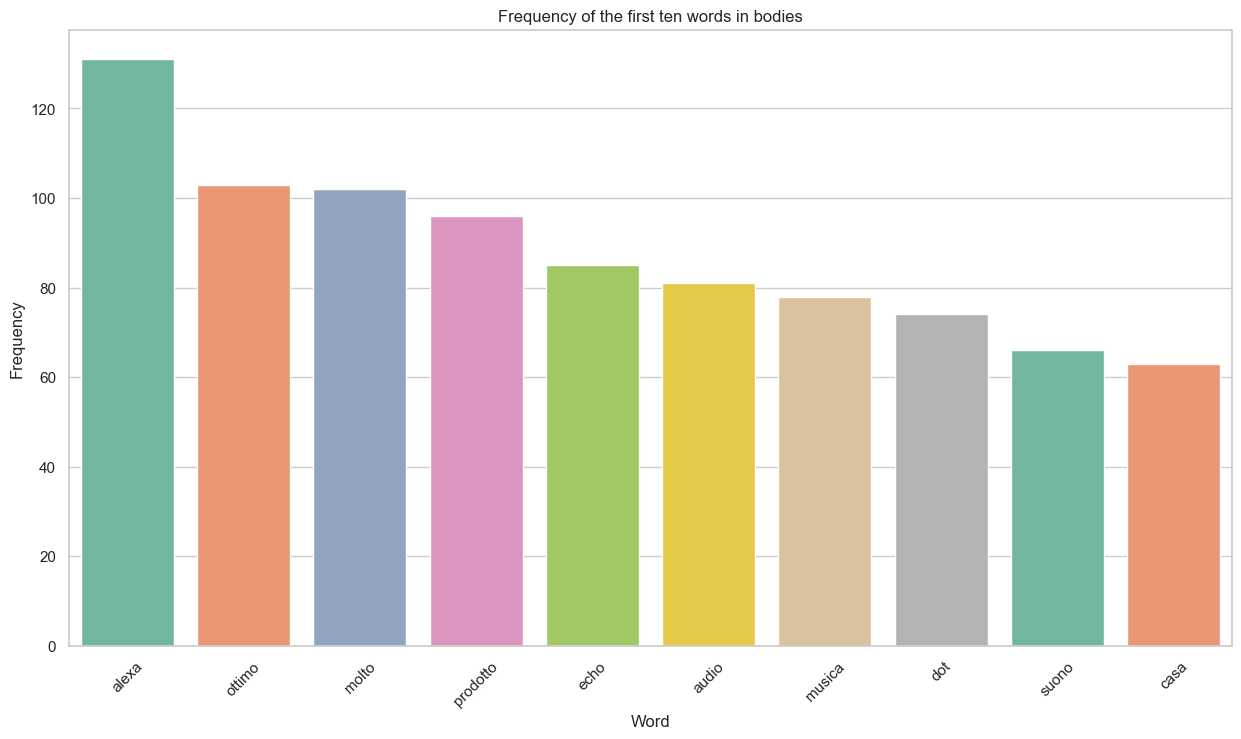

In [10]:
df_freq_body = pd.DataFrame(list(sorted_fd_body.items())[:10], columns=['Categories', 'Values'])

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Categories', y='Values', data=df_freq_body, palette='Set2')

ax.set(xlabel='Word', ylabel='Frequency', title='Frequency of the first ten words in bodies')
plt.xticks(rotation=45)

plt.show()

### How stars are subdivided?

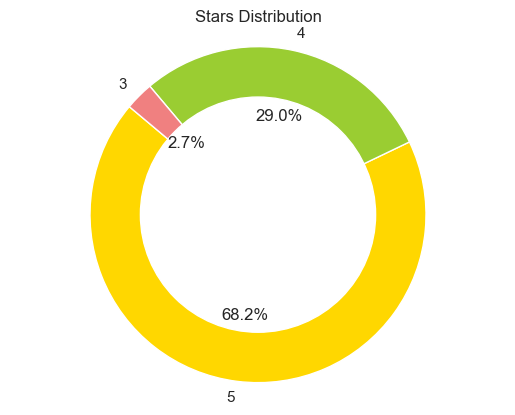

In [11]:
stars = df['Stars'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral']

fig, ax = plt.subplots()
ax.pie(stars.iloc[:], labels=list(stars.index), colors=colors, autopct='%1.1f%%', startangle=140)

# Draw a white circle in the center to create a donut chart
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Add a title
plt.title('Stars Distribution')

# Show the plot
plt.show()

In [12]:
df['Body'].fillna('', inplace=True)

In [13]:
df['Full Review'] = df.apply(lambda row: (row['Title'] + ' ' + row['Body']), axis=1) # joining titles and bodies in orderto get a full text 

### Lemmatization

In [14]:
lemm = WordNetLemmatizer()

In [15]:
words = [nltk.word_tokenize(element, language='italian') for element in df['Full Review']]

In [16]:
words

[['ne',
  'puoi',
  'fare',
  'a',
  'meno',
  'fin',
  'quando',
  'non',
  'lo',
  'provi',
  'spedizione',
  'amazon',
  'sulle',
  'spedizione',
  'è',
  'una',
  'garanzia',
  'meno',
  'di',
  'ore',
  'per',
  'la',
  'consegna',
  'imballaggio',
  'e',
  'confezione',
  'l',
  'echo',
  'dot',
  'è',
  'arrivato',
  'in',
  'una',
  'scatola',
  'amazon',
  'di',
  'cartone',
  'assieme',
  'ad',
  'altri',
  'prodotti',
  'protetto',
  'da',
  'un',
  'foglio',
  'accartocciato',
  'di',
  'carta',
  'riciclata',
  'la',
  'confezione',
  'è',
  'in',
  'cartone',
  'di',
  'colore',
  'blu',
  'sopra',
  'è',
  'raffigurato',
  'l',
  'echo',
  'dot',
  'il',
  'marchio',
  'amazon',
  'il',
  'testo',
  'echo',
  'dot',
  'e',
  'per',
  'distinguerlo',
  'da',
  'quello',
  'di',
  'quarta',
  'generazione',
  'in',
  'alto',
  'a',
  'destra',
  'un',
  'triangolino',
  'con',
  'stampigliato',
  'th',
  'generazione',
  'sul',
  'retro',
  'le',
  'diverse',
  'specifiche

In [17]:
for sublist in words:
    for word in sublist:
        lemm.lemmatize(word)

In [18]:
rejoined = []
for i in range(len(words)):
    rejoined.append(' '.join(words[i]))

In [19]:
df['Lemmatized Full Review'] = rejoined

In [20]:
df['Lemmatized Full Review']

0      ne puoi fare a meno fin quando non lo provi sp...
1      ottimo ma allora non si capisce perché la vers...
2      qualità audio ottima ma attenzione a disattiva...
3      la domotica alla portata di tutti spedizione r...
4      echo dot un assistente virtuale di qualità sup...
                             ...                        
505                          buon prodotto buon prodotto
506    semplicemente perfetto semplice da installare ...
507    un buon acquisto ero una delle poche che ancor...
508    alexa utile assistente ho acquistato alexa ave...
509    idea regalo l ho regalato per natale ad una fa...
Name: Lemmatized Full Review, Length: 510, dtype: object

### Review classification

Here I calculate the polarity of every review. 

To do that I used the function polarity_scores() that returns me a dictionary composed of the negative, neutral, positive and compound polarity of the text I gaver as input.

In [21]:
sia = SentimentIntensityAnalyzer()
text_polarity = [sia.polarity_scores(str(element)) for element in df['Lemmatized Full Review']]

In [22]:
text_polarity

[{'neg': 0.006, 'neu': 0.97, 'pos': 0.024, 'compound': 0.8555},
 {'neg': 0.039, 'neu': 0.931, 'pos': 0.031, 'compound': -0.296},
 {'neg': 0.014, 'neu': 0.957, 'pos': 0.029, 'compound': 0.34},
 {'neg': 0.005, 'neu': 0.954, 'pos': 0.042, 'compound': 0.9231},
 {'neg': 0.067, 'neu': 0.908, 'pos': 0.025, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.077, 'neu': 0.872, 'pos': 0.051, 'compound': -0.296},
 {'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.4019},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.086, 'neu': 0.914, 'pos': 0.0, 'compound': -0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.061, 'neu': 0.808, 'pos': 0.131, 'compound': 0.4939},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.34},
 {'neg': 0.0, 'neu': 1.

In [39]:
df.head()

,Title,Body,Stars,Full Review,Lemmatized Full Review
0,ne puoi fare a meno fin quando non lo provi,spedizione amazon sulle spedizione è una gar...,5,ne puoi fare a meno fin quando non lo provi ...,ne puoi fare a meno fin quando non lo provi sp...
1,ottimo ma,allora non si capisce perché la versione con o...,5,ottimo ma allora non si capisce perché la v...,ottimo ma allora non si capisce perché la vers...
2,qualità audio ottima ma attenzione a disattiv...,l echo dot è un dispositivo interessante ma h...,4,qualità audio ottima ma attenzione a disattiv...,qualità audio ottima ma attenzione a disattiva...
3,la domotica alla portata di tutti,spedizione rapidissima come da tradizione am...,5,la domotica alla portata di tutti spedizione...,la domotica alla portata di tutti spedizione r...
4,echo dot un assistente virtuale di qualità ...,ho acquistato l echo dot e devo dire che son...,5,echo dot un assistente virtuale di qualità ...,echo dot un assistente virtuale di qualità sup...


I assigned a keyword to every review according to the value of the polarity

In [47]:
list_polarity = []
for i in range(len(df)):
    if text_polarity[i]['compound'] < -0.05:
        list_polarity.append('Bad')
    elif text_polarity[i]['compound'] > 0.05:
        list_polarity.append('Good')
    else:
        list_polarity.append('Neutral')

df['Polarity Text'] = list_polarity

In [48]:
df['Polarity Text'].value_counts()

Polarity Text
Neutral    328
Good       111
Bad         71
Name: count, dtype: int64

In [49]:
df.dtypes

Title                     object
Body                      object
Stars                      int64
Full Review               object
Lemmatized Full Review    object
Polarity Text             object
dtype: object

Here I joined the titles and the bodies to get a full review since I used both to calculate the polarity and also because for further processing I will need the full text

In [50]:
df.sample(10)

,Title,Body,Stars,Full Review,Lemmatized Full Review,Polarity Text
14,dipendenza,non ti rendi conto della sua utilità fin quand...,5,dipendenza non ti rendi conto della sua utilit...,dipendenza non ti rendi conto della sua utilit...,Neutral
109,ottimo prodotto,ottimo prodotto,5,ottimo prodotto ottimo prodotto,ottimo prodotto ottimo prodotto,Neutral
368,classe inferiore rispetto la,preferisco la generazione,4,classe inferiore rispetto la preferisco la ...,classe inferiore rispetto la preferisco la gen...,Neutral
350,favolosi,che dire sono piccoli ma hanno un audio fantas...,4,favolosi che dire sono piccoli ma hanno un aud...,favolosi che dire sono piccoli ma hanno un aud...,Bad
89,alexa gen ottimo come gli altri alexa,ho perso il conto di quanti echo dot ho compra...,5,alexa gen ottimo come gli altri alexa ho per...,alexa gen ottimo come gli altri alexa ho perso...,Neutral
502,eccellente,x me,4,eccellente x me,eccellente x me,Neutral
186,una garanzia,pratico e maneggevole,5,una garanzia pratico e maneggevole,una garanzia pratico e maneggevole,Neutral
71,prodotto indispensabile,avevo un echo dot di di quarta generazione che...,5,prodotto indispensabile avevo un echo dot di d...,prodotto indispensabile avevo un echo dot di d...,Good
140,utile,la uso in ogni circostanza,5,utile la uso in ogni circostanza,utile la uso in ogni circostanza,Neutral
208,ineccepibile,nulla da dire ottima segretaria per la gestio...,5,ineccepibile nulla da dire ottima segretaria ...,ineccepibile nulla da dire ottima segretaria p...,Bad


## Dense Matrix to feed the models

Since the standard one with all the words could not be admissible since Machine Learning Models doesn't know how to interpret a certain word in order to classify a phrase, I needed to map every review according to the word it has in it.

To do so there is a particular module of sklearn.feature_extraction.text, **TfidfVectorizer** that allows us to create a dense matrix in order to see for every word a level of beloging to every review.

To calculate that level of belonging the module uses a formula:
$$
W_{x,y} = tf_{x,y} * \log{\frac{N}{df_x}}
$$

Where:
1. $ W_{x,y} $ is word x within review y;
2. $tf_{x,y}$ is the frequency of x in y;
3. $df_x$ is the number of review containing x;
4. $N$ is the total number of reviews

In [51]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Lemmatized Full Review'])
feature_names = vectorizer.get_feature_names_out()
matrix = vectors.todense()
list_dense = matrix.tolist()
sparse_matrix = pd.DataFrame(list_dense, columns=feature_names)

Doing that I can assign to every row of the matrix containing all the reviews the same value of polarity, since the order is still the same 

In [52]:
sparse_matrix['Polarity_Text'] = list_polarity

In [53]:
sparse_matrix.sample(10)

,abbassare,abbasso,abbastanza,abbia,abbiamo,abbiano,abbina,abbinabili,abbinamento,abbinandolo,...,vuole,web,wi,wifi,wireless,wow,xd,youtube,zio,Polarity_Text
109,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral
375,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral
328,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Good
464,0.0,0.0,0.116975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.119709,0.0,0.0,0.0,0.0,0.0,Bad
169,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral
81,0.0,0.0,0.121678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.124522,0.0,0.0,0.0,0.0,0.0,Neutral
172,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral
242,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Good
330,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral
230,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,Neutral


### Writing dataframe and sparse matrix into two files

In [54]:
df.to_csv('data_final.csv', index=False)

In [55]:
sparse_matrix.to_csv('matrix.csv', index=False)